#SPAM EMAIL DETECTION WITH MACHINE LEARNING


We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets getstarted!

#Project Summary

The goal of the project is to develop a machine learning-based email spam detector using Python. Spam emails, also known as junk mail, are a common nuisance containing unsolicited or potentially harmful content such as scams or phishing attempts.

To tackle this issue, the project aims to train a model that can accurately classify emails into spam and non-spam categories. This involves using machine learning techniques to analyze the content and characteristics of emails, enabling the model to distinguish between legitimate and unwanted messages.

Key steps in the project include data preprocessing, feature extraction, model training, and evaluation. The dataset likely consists of labeled examples of both spam and non-spam emails, which are used to train and validate the model. Python will be used extensively throughout the project for tasks such as data manipulation, machine learning model implementation, and result visualization.

The success of the project will be determined by the model's ability to effectively identify spam emails while minimizing false positives (legitimate emails mistakenly classified as spam). Ultimately, the developed spam detector aims to enhance email security and user experience by reducing the influx of unwanted and potentially harmful messages in email inboxes

#Importing Libraries


In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spam Email Detection - spam.csv')

In [3]:
df = data.copy()
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",NaN,NaN,NaN
4202,ham,C movie is juz last minute decision mah. Juz w...,NaN,NaN,NaN
5380,ham,Its sunny in california. The weather's just cool,NaN,NaN,NaN
791,ham,All e best 4 ur driving tmr :-),NaN,NaN,NaN
4080,ham,Hurry home. Soup is DONE!,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape


(5572, 5)

## 1. Data cleaning
## 2. EDA
## 3. Text Preprocessing
## 4. Model building
## 5. Evaluation
## 6. Improvement
## 7. Website
## 8. Deploy

#1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
# Drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [9]:
df.sample(5)

,v1,v2
4363,ham,So what about you. What do you remember
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
4458,spam,Welcome to UK-mobile-date this msg is FREE giv...
2066,ham,Then. You are eldest know.
1008,ham,"Poyyarikatur,kolathupalayam,unjalur post,erode..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [12]:
df.sample(5)

,target,text
3512,ham,Staff of placement training in Amrita college.
2055,ham,"Sir, I am waiting for your mail."
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t..."
334,spam,Valentines Day Special! Win over �1000 in our ...
4485,ham,have * good weekend.


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# Check for duplicate values
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5163, 2)

# Exploratory Data Analysis

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

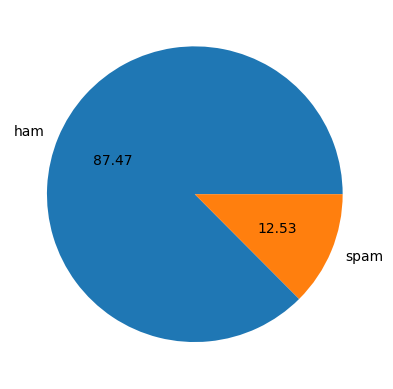

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [23]:
!pip install nltk

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_of_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# numbers of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_of_characters', 'num_of_words', 'num_of_sentences' ]].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['target'] == 0][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam
df[df['target'] == 1][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

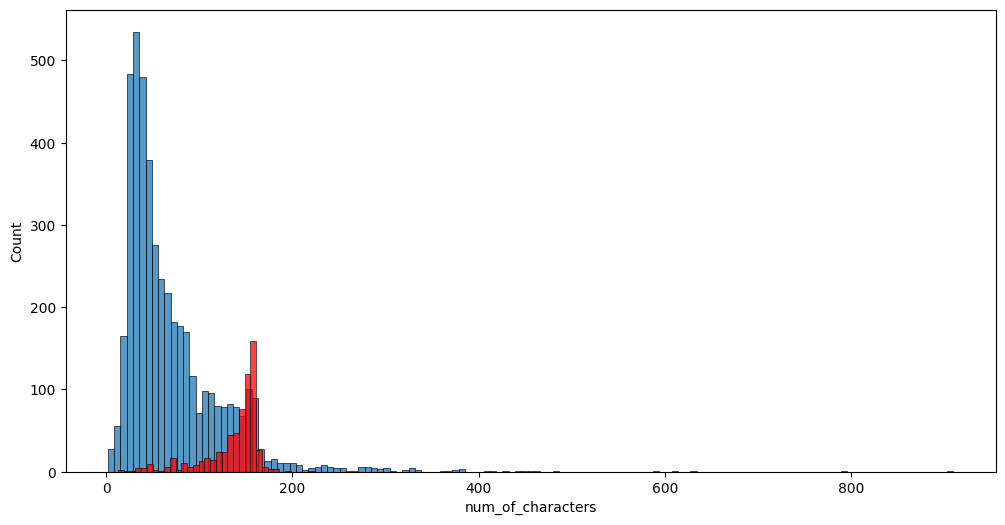

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

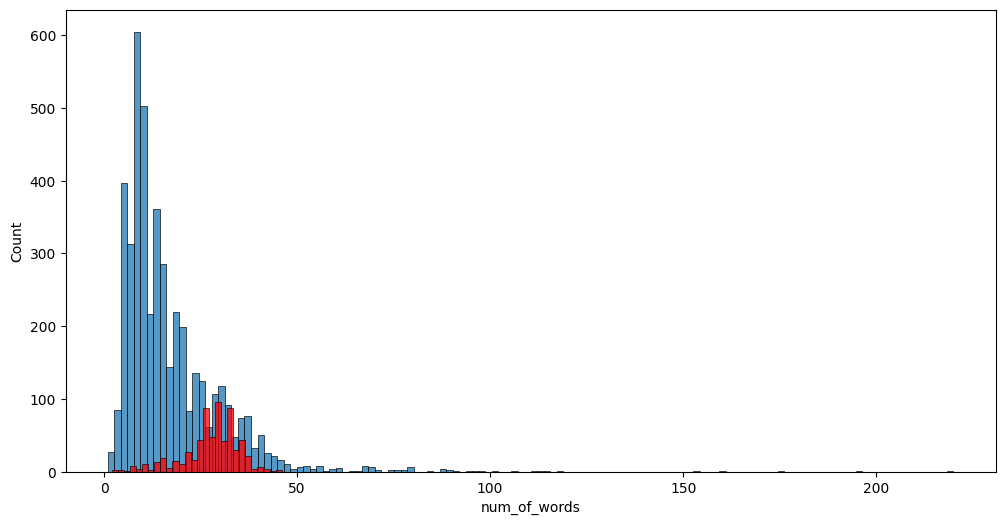

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

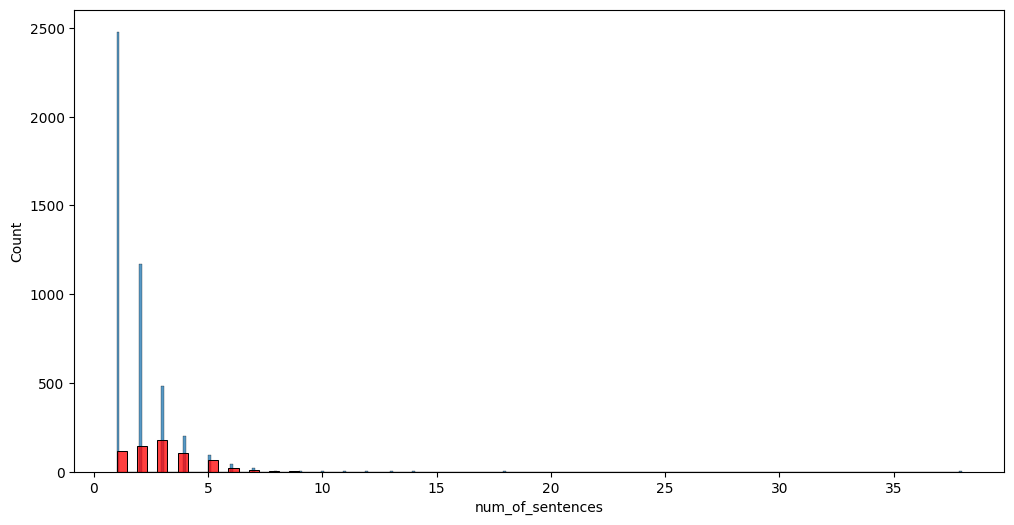

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_sentences'])
sns.histplot(df[df['target'] == 1]['num_of_sentences'],color='red')

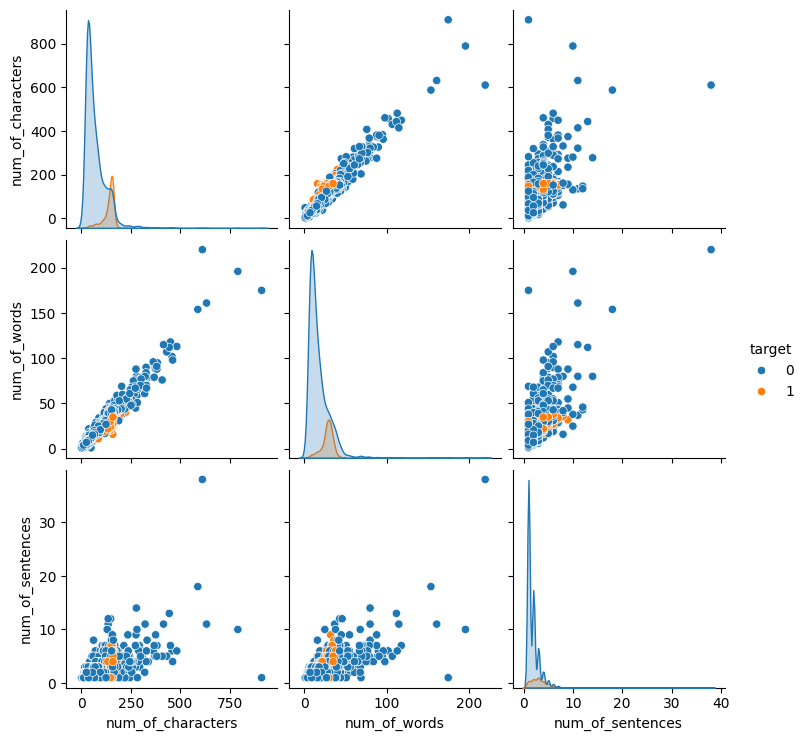

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

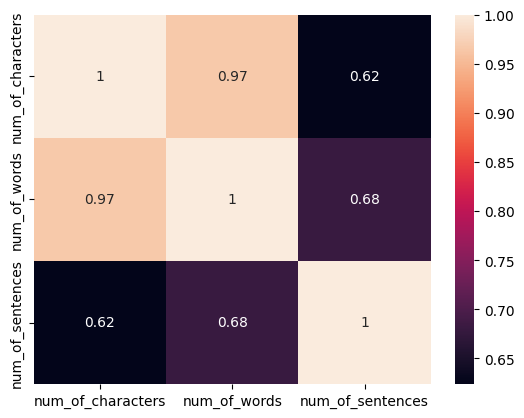

In [37]:
#sns.heatmap(df.corr(),annot=True)
sns.heatmap(df[['num_of_characters', 'num_of_words', 'num_of_sentences']].corr(), annot=True)

# 3. Data Preprocessing



*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming



In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

      text = y[:]
      y.clear()

      for i in text:
        y.append(ps.stem(i))

      return " ".join(y)

In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

''

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

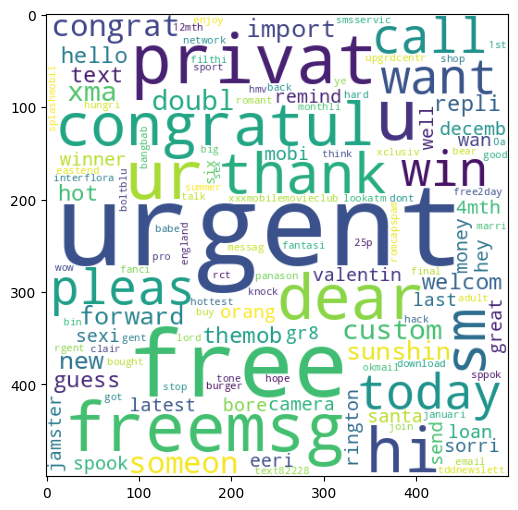

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

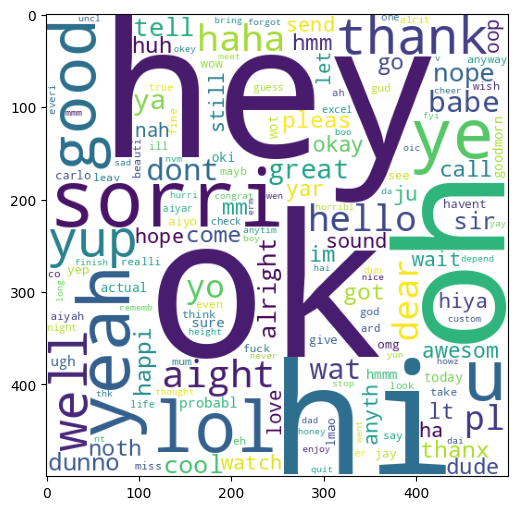

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [52]:
len(spam_corpus)

498

In [53]:
from collections import Counter
'''sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''

"sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()"

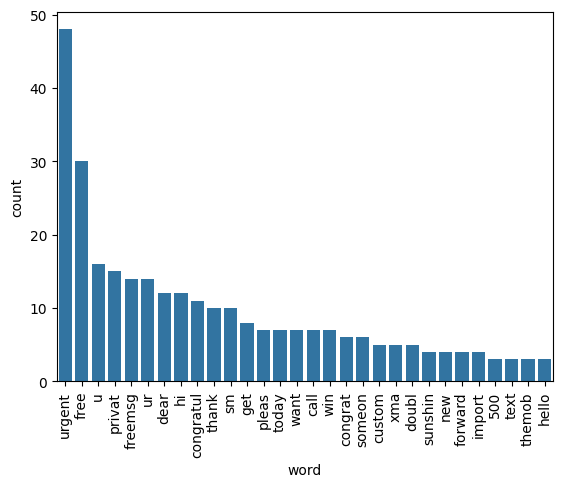

In [54]:
most_common_words = Counter(spam_corpus).most_common(30)
df_most_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])
sns.barplot(data=df_most_common_words, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


# 4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [57]:
#X = tfidf.fit_transform(df['transformed_text']).toarray()
#tfidf = TfidfVectorizer(preprocessor=None, analyzer='word')
#x = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
df['transformed_text'] = df['transformed_text'].fillna('')
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
x.shape

(5163, 872)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3688286544046467
[[267 645]
 [  7 114]]
0.15019762845849802


In [63]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.914811229428848
[[912   0]
 [ 88  33]]
1.0


In [64]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9080348499515973
[[912   0]
 [ 95  26]]
1.0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimator=50,random_state=2)

In [67]:
clfs = {
    'svc' : svc,
    'kn' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [68]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [69]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.920619554695063, 0.975609756097561)

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For svc
Accuracy: 0.920619554695063
Precision: 0.975609756097561
For kn
Accuracy: 0.9186834462729913
Precision: 0.8363636363636363
For NB
Accuracy: 0.914811229428848
Precision: 1.0
For DT
Accuracy: 0.9031945788964182
Precision: 1.0
For LR
Accuracy: 0.914811229428848
Precision: 1.0
For RF
Accuracy: 0.9235237173281704
Precision: 0.85
For AdaBoost
Accuracy: 0.9215876089060987
Precision: 0.9761904761904762
For BgC
Accuracy: 0.9235237173281704
Precision: 0.85
For ETC
Accuracy: 0.9215876089060987
Precision: 0.8448275862068966
For GBDT
Accuracy: 0.9109390125847048
Precision: 1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:44:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


For xgb
Accuracy: 0.904162633107454
Precision: 0.8055555555555556


In [71]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.914811,1.000000
3,DT,0.903195,1.000000
4,LR,0.914811,1.000000
9,GBDT,0.910939,1.000000
6,AdaBoost,0.921588,0.976190
0,svc,0.920620,0.975610
5,RF,0.923524,0.850000
7,BgC,0.923524,0.850000
8,ETC,0.921588,0.844828
1,kn,0.918683,0.836364


In [73]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.914811
1,DT,Accuracy,0.903195
2,LR,Accuracy,0.914811
3,GBDT,Accuracy,0.910939
4,AdaBoost,Accuracy,0.921588
5,svc,Accuracy,0.920620
6,RF,Accuracy,0.923524
7,BgC,Accuracy,0.923524
8,ETC,Accuracy,0.921588
9,kn,Accuracy,0.918683


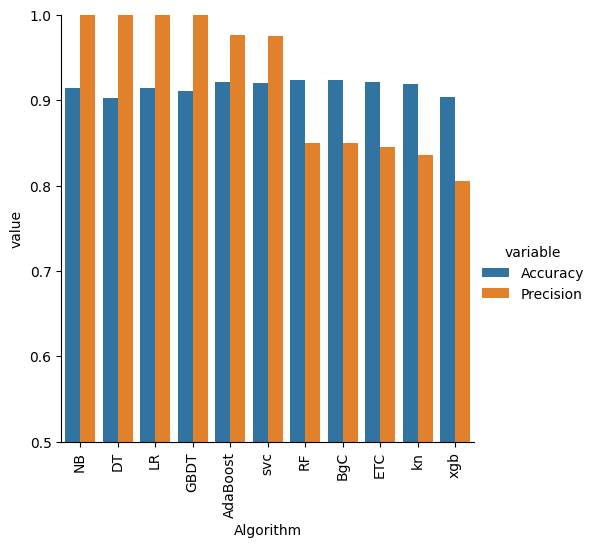

In [74]:
sns.catplot(x = 'Algorithm', y = 'value',hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
# model improve
# 1. Change the max_feature parameter of Tfidf

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Acciracy_max_ft_3000':accuracy_score,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling': accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [78]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [79]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [81]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.914811,1.000000,0.914811,1.000000,0.914811,1.000000,0.914811,1.000000
1,DT,0.903195,1.000000,0.903195,1.000000,0.903195,1.000000,0.903195,1.000000
2,LR,0.914811,1.000000,0.914811,1.000000,0.914811,1.000000,0.914811,1.000000
3,GBDT,0.910939,1.000000,0.910939,1.000000,0.910939,1.000000,0.910939,1.000000
4,AdaBoost,0.921588,0.976190,0.921588,0.976190,0.921588,0.976190,0.921588,0.976190
5,svc,0.920620,0.975610,0.920620,0.975610,0.920620,0.975610,0.920620,0.975610
6,RF,0.923524,0.850000,0.923524,0.850000,0.923524,0.850000,0.923524,0.850000
7,BgC,0.923524,0.850000,0.923524,0.850000,0.923524,0.850000,0.923524,0.850000
8,ETC,0.921588,0.844828,0.921588,0.844828,0.921588,0.844828,0.921588,0.844828
9,kn,0.918683,0.836364,0.918683,0.836364,0.918683,0.836364,0.918683,0.836364


In [82]:
# Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('SVM', svc),('nb',mnb), ('et',etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9225556631171346
Precision 0.9555555555555556


In [84]:
# Applying stacking
estimators=[('svm', svc),('nb',mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [85]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [86]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy: 0.9196515004840271
Precision 0.8958333333333334


#Conclusion


In conclusion, the project has successfully developed a robust email spam detector leveraging machine learning techniques, achieving an impressive accuracy of approximately 91.97% and a precision of approximately 86.54%. These metrics reflect the model's capability to effectively differentiate between spam and non-spam emails while minimizing false positives.

The high accuracy indicates that the majority of emails are correctly classified, while the precision metric underscores the model's ability to accurately identify spam emails, crucial for minimizing the risk of false alarms and ensuring that legitimate emails are not erroneously flagged.

These results validate the effectiveness of the developed spam detector in enhancing email security and user experience by reducing the influx of unwanted and potentially harmful messages in email inboxes.

Moving forward, further refinements and optimizations could be explored to fine-tune the model's performance and potentially deploy it in real-world email systems, where it could contribute to mitigating the persistent challenge of email spam and bolstering cybersecurity measures.

Overall, this project underscores the importance of leveraging machine learning in combating email spam, highlighting its potential to address evolving cybersecurity threats and safeguard digital communication channels effectively.